# Your Title Information Goes Here
Fill me in

## Setup

In [2]:
include("Include.jl");

    Updating git-repo `https://github.com/varnerlab/VLQuantitativeFinancePackage.jl.git`
   Resolving package versions...
  No Changes to `~/Documents/GitHub/5760FinalProject/CHEME-5660-Project-Template-F23/Project.toml`
  No Changes to `~/Documents/GitHub/5760FinalProject/CHEME-5660-Project-Template-F23/Manifest.toml`
  Activating project at `~/Documents/GitHub/5760FinalProject/CHEME-5660-Project-Template-F23`
  No Changes to `~/Documents/GitHub/5760FinalProject/CHEME-5660-Project-Template-F23/Project.toml`
  No Changes to `~/Documents/GitHub/5760FinalProject/CHEME-5660-Project-Template-F23/Manifest.toml`
    Updating registry at `~/.julia/registries/General.toml`
    Updating git-repo `https://github.com/varnerlab/VLQuantitativeFinancePackage.jl.git`
  No Changes to `~/Documents/GitHub/5760FinalProject/CHEME-5660-Project-Template-F23/Project.toml`
  No Changes to `~/Documents/GitHub/5760FinalProject/CHEME-5660-Project-Template-F23/Manifest.toml`


## Prerequisites: Load historical dataset, compute expected returns and get 2023 `SPY` data
We gathered a daily open-high-low-close `dataset` for each firm in the [S&P500](https://en.wikipedia.org/wiki/S%26P_500) since `01-03-2018` until `12-01-2023`, along with data for a few exchange traded funds and volatility products during that time. 

In [7]:
original_dataset = load(joinpath(_PATH_TO_DATA, 
        "SP500-Daily-OHLC-1-3-2018-to-12-01-2023.jld2")) |> x-> x["dataset"];

### Clean the data
Not all of the tickers in our dataset have the maximum number of trading days for various reasons, e.g., acquistion or de-listing events. Let's collect only those tickers with the maximum number of trading days.

* First, let's compute the number of records for a company that we know has a maximim value, e.g., `AAPL` and save that value in the `maximum_number_trading_days` variable:

In [8]:
maximum_number_trading_days = original_dataset["AAPL"] |> nrow;

Now, lets iterate through our data and collect only those tickers that have `maximum_number_trading_days` records. Save that data in the `dataset::Dict{String,DataFrame}` variable:

In [9]:
dataset = Dict{String,DataFrame}();
for (ticker,data) ∈ original_dataset
    if (nrow(data) == maximum_number_trading_days)
        dataset[ticker] = data;
    end
end
dataset;

Let's get a list of firms that we have in cleaned up `dataset`, and save it in the `all_tickers` array:

In [10]:
all_tickers = keys(dataset) |> collect |> sort;
K = length(all_tickers);

### Get the 2023 `SPY` data

In [11]:
startdate = Date(2023,01,03);
SPY_dataset = dataset["SPY"];
SPY_df = filter(:timestamp => x-> x >= startdate, SPY_dataset);

### Compute the expected return for all firms in the dataset
The expected return $\mathbb{E}(r_{i})$ and covariance matrix $\Sigma$ will be used in our calculations, so we'll provide values for both of these items for the entire data set (all `N = 459` tickers), and then you can pick out which tickers you are interested in. 

* First, we compute the expected (annualized) log return by passing the `dataset` and the entire list of firms we have in the dataset (held in the $N\times{1}$ `all_array` array) to the `log_return_matrix(...)` method. The result is stored in the `all_firms_return_matrix` variable, a $T-1\times{N}$ array of log return values. Each row of `all_firms_return_matrix` corresponds to a time-value, while each column corresponds to a firm:

In [12]:
all_firms_return_matrix = log_return_matrix(dataset, all_tickers, 
    Δt = (1.0/252.0), risk_free_rate = 0.0);

## Your project starts here ....

In [39]:
dataset["EQIX"]

Row,volume,volume_weighted_average_price,open,close,high,low,timestamp,number_of_transactions
,Float64,Float64,Float64,Float64,Float64,Float64,DateTime,Int64
1,464639.0,449.724,449.14,448.98,452.56,446.65,2018-01-03T05:00:00,8291
2,450536.0,449.038,449.33,447.95,450.46,447.43,2018-01-04T05:00:00,7637
3,335822.0,449.403,450.15,449.49,450.94,447.81,2018-01-05T05:00:00,6513
4,532480.0,457.642,450.79,458.2,461.36,448.0,2018-01-08T05:00:00,7135
5,397765.0,456.623,459.89,455.98,461.73,454.01,2018-01-09T05:00:00,8112
6,636317.0,444.33,453.02,443.0,453.78,442.26,2018-01-10T05:00:00,9516
7,606450.0,437.663,443.0,435.39,452.28,435.04,2018-01-11T05:00:00,10683
8,1.0907e6,432.37,436.17,435.95,439.535,428.3,2018-01-12T05:00:00,11307
9,858147.0,448.663,436.8,448.1,452.61,436.49,2018-01-16T05:00:00,13670


In [42]:
##One stock from each of the 11 Sectors of the Stock Market
firms = ["XOM", "SHW", "UPS", "AEP", "JNJ", "JPM", "AMZN", "KO", "AAPL", "GOOG", "EQIX"]

11-element Vector{String}:
 "XOM"
 "SHW"
 "UPS"
 "AEP"
 "JNJ"
 "JPM"
 "AMZN"
 "KO"
 "AAPL"
 "GOOG"
 "EQIX"

In [43]:
return_matrix = log_return_matrix(dataset, firms);

In [44]:
return_matrix

1488×11 Matrix{Float64}:
  1.72823    0.363204    4.64483   …  -0.179406     2.37529   -0.384409
 -1.3025     3.06367    -1.26941       2.46956      2.79747    0.204755
  1.81427    1.7541      2.84004      -0.087144     1.63994    4.57797
 -0.333036   1.00118     1.36254      -0.449472    -0.183967  -0.561627
 -1.48765   -2.46706     0.733281     -0.971584    -1.46971   -6.87689
  1.521      1.72069     5.89427   …   2.1778       0.612775  -3.81039
  1.72165    4.42908     2.00942       2.24129      3.46992   -3.06581
 -1.25749   -2.41073    -1.4836        1.0621       2.05907    9.32139
  2.08766   -0.548761    1.15596      -0.224455    -0.157897  -3.33014
 -0.596972   2.81477     0.825807      2.9266       0.17936   -1.48527
 -1.26847   -0.153232   -2.28898   …  -1.3274       1.64984   -1.06441
  2.20827   -2.71797    -0.99541      -1.8654       4.10985   -1.42438
  0.891746   1.20788    -0.883815      1.19001      2.95003    3.29605
  ⋮                                ⋱             

In [45]:
covariance_matrix = cov(return_matrix);

In [46]:
covariance_matrix

11×11 Matrix{Float64}:
 21.5044    4.50102   5.51185   3.38177  …   5.59559   5.79458   1.90177
  4.50102  17.1274    6.43517   4.20515      7.47799   7.25954   6.80914
  5.51185   6.43517  16.5078    2.85428      6.96623   6.50921   4.59023
  3.38177   4.20515   2.85428  10.9538       3.46339   2.67955   5.73316
  3.6575    3.60744   3.10307   4.09283      3.9379    3.29675   3.65188
 11.0445    7.24617   7.11675   4.1137   …   6.86605   7.23253   3.81275
  3.9344    6.89345   7.45695   2.17589     11.8328   13.1035    7.36881
  5.4103    5.42025   3.57467   5.4018       4.35116   3.94995   4.20224
  5.59559   7.47799   6.96623   3.46339     17.5793   10.981     6.5073
  5.79458   7.25954   6.50921   2.67955     10.981    17.3405    5.80367
  1.90177   6.80914   4.59023   5.73316  …   6.5073    5.80367  15.6577

In [47]:
expected_return = mean(return_matrix, dims=1) |> vec;

In [48]:
expected_return

11-element Vector{Float64}:
 0.030591034311174593
 0.12048080131600376
 0.034524822744698855
 0.01837981131812832
 0.019480217693440154
 0.06345653102772658
 0.15140233777420561
 0.04288881811637991
 0.2513056879829063
 0.15294538497225962
 0.10209896337989022

In [51]:
number_of_firms = length(firms);
initial = zeros(number_of_firms);
initial[1] = 1.0;
bounds = zeros(number_of_firms,2);
bounds[:,2] .= 1.0;
risk_free_rate = 0.045
number_of_points = 20;

In [52]:
problem_risk = build(MyMarkowitzRiskyAssetOnlyPortfiolioChoiceProblem, (
    Σ = covariance_matrix,
    μ = expected_return,
    bounds = bounds,
    initial = initial,
    R = 0.0
));

In [55]:
minimum_desired_reward_array = range(risk_free_rate, stop = 10*risk_free_rate, length = number_of_points) |> collect;
minimum_desired_reward_array

20-element Vector{Float64}:
 0.045
 0.0663157894736842
 0.08763157894736842
 0.10894736842105263
 0.13026315789473683
 0.15157894736842104
 0.17289473684210524
 0.19421052631578944
 0.21552631578947368
 0.23684210526315788
 0.2581578947368421
 0.27947368421052626
 0.3007894736842105
 0.32210526315789473
 0.3434210526315789
 0.36473684210526314
 0.3860526315789473
 0.40736842105263155
 0.4286842105263157
 0.44999999999999996

In [56]:
efficient_frontier = Dict{Float64,Float64}();
for i ∈ eachindex(minimum_desired_reward_array)
    
    # update the problem object -
    problem_risk.R = minimum_desired_reward_array[i];
    
    # compute -
    solution = solve(problem_risk)

    # check: did this converge?
    status_flag = solution["status"];    
    if (status_flag == MathOptInterface.LOCALLY_SOLVED)
        key = sqrt(solution["objective_value"]);
        value = solution["reward"];
        efficient_frontier[key] = value;
    end
end

In [57]:
efficient_frontier

Dict{Float64, Float64} with 10 entries:
  3.62588 => 0.215526
  2.36824 => 0.0876316
  2.25493 => 0.0450585
  2.49375 => 0.108947
  2.85881 => 0.151579
  3.94352 => 0.236842
  3.08937 => 0.172895
  2.65861 => 0.130263
  2.28693 => 0.0663158
  3.34506 => 0.194211

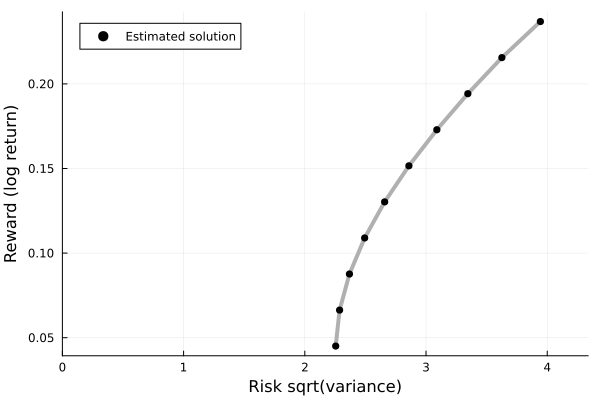

In [58]:
plot(efficient_frontier, lw=4, xlabel="Risk sqrt(variance)", 
    ylabel="Reward (log return)", fontsize=18, label="", c=:gray69, 
    xlim=(0.0, 1.1*maximum(efficient_frontier).first))
scatter!(efficient_frontier, label="Estimated solution", c=:black)

In [67]:
problem_risk.R = 0.234;
solution_riskonly = solve(problem_risk_free)

Dict{String, Any} with 4 entries:
  "argmax"          => [-9.9976e-9, 0.539211, -9.99794e-9, -9.99745e-9, -9.9974…
  "reward"          => 0.45
  "status"          => LOCALLY_SOLVED
  "objective_value" => 109.603

In [68]:
w_opt = solution_riskonly["argmax"];
idx = findall(x-> abs(x)>0.01, w_opt)
[firms[idx] w_opt[idx]]

5×2 Matrix{Any}:
 "SHW"   0.539211
 "AMZN"  0.405013
 "AAPL"  1.0
 "GOOG"  1.0
 "EQIX"  0.121798

In [59]:
problem_risk_free = build(MyMarkowitzRiskyRiskFreePortfiolioChoiceProblem, (
    Σ = covariance_matrix,
    μ = expected_return,
    bounds = bounds,
    initial = initial,
    risk_free_rate = risk_free_rate,
    R = 0.0
));

In [60]:
capital_allocation_line = Dict{Float64,Float64}();
for i ∈ eachindex(minimum_desired_reward_array)
    
    # update the problem object -
    problem_risk_free.R = minimum_desired_reward_array[i];
    
    # compute -
    solution_risk_free = solve(problem_risk_free)

    # check: did this converge?
    status_flag = solution_risk_free["status"];    
    if (status_flag == MathOptInterface.LOCALLY_SOLVED)
        key = sqrt(solution_risk_free["objective_value"]);
        value = solution_risk_free["reward"];
        capital_allocation_line[key] = value;
    end
end

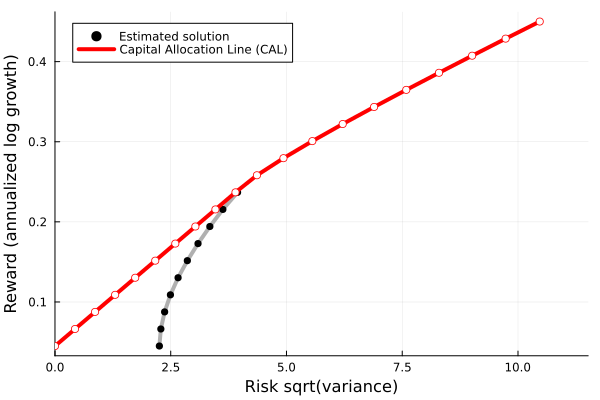

In [61]:
plot!(capital_allocation_line, lw=4, xlabel="Risk sqrt(variance)", 
    ylabel="Reward (annualized log growth)", fontsize=18, c=:red, 
    xlim=(0.0, 1.1*maximum(capital_allocation_line).first), label="Capital Allocation Line (CAL)")
scatter!(capital_allocation_line, label="", msc=:red, mc=:white)

In [71]:
problem_risk_free.R = 0.234;
solution_risk_free = solve(problem_risk_free)

Dict{String, Any} with 4 entries:
  "argmax"          => [-9.79914e-9, -8.65608e-9, -9.82561e-9, -9.76076e-9, -9.…
  "reward"          => 0.234
  "status"          => LOCALLY_SOLVED
  "objective_value" => 14.7538

In [72]:
w_opt = solution_risk_free["argmax"];
idx = findall(x-> abs(x)>0.01, w_opt)
[firms[idx] w_opt[idx]]

1×2 Matrix{Any}:
 "AAPL"  0.916116

problem_risk_free = build(MyMarkowitzRiskyRiskFreePortfiolioChoiceProblem, (
    Σ = covariance_matrix,
    μ = expected_return,
    bounds = bounds,
    initial = initial,
    risk_free_rate = risk_free_rate,
    R = 0.0
));## Disclaimer and Risks
__This content is offered solely for training and  informational purposes__. No offer or solicitation to buy or sell securities or derivative products, or any investment or trading advice or strategy,  is made, given, or endorsed by the teaching team. 

__Trading involves risk__. Carefully review your financial situation before investing in securities, futures contracts, options, or commodity interests. Past performance, whether actual or indicated by historical tests of strategies, is no guarantee of future performance or success. Trading is generally inappropriate for someone with limited resources, investment or trading experience, or a low-risk tolerance.  Only risk capital that is not required for living expenses.

__You are fully responsible for any investment or trading decisions you make__. Such decisions should be based solely on your evaluation of your financial circumstances, investment or trading objectives, risk tolerance, and liquidity needs.